In [246]:
'''
Dựa trên tập data về mức tiêu thụ nhiên liệu của từng dòng xe, dự đoán mức sản sinh Co2 tương ứng
Dataset: FuelConsumptionCo2.csv
'''

'\nDựa trên tập data về mức tiêu thụ nhiên liệu của từng dòng xe, dự đoán mức sản sinh Co2 tương ứng\nDataset: FuelConsumptionCo2.csv\n'

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and quick view data

In [248]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [249]:
data.shape

(1067, 13)

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [251]:
for c in data.select_dtypes('object').columns:
    print (c)
    print(data['MAKE'].unique())

MAKE
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']
MODEL
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']
VEHICLECLASS
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' '

In [252]:
data.duplicated().sum()

0

In [253]:
data.drop_duplicates()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


# Data Cleaning

In [254]:
for c in data.select_dtypes('object').columns:
    data[c] = data[c].astype('category')

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 1067 non-null   int64   
 1   MAKE                      1067 non-null   category
 2   MODEL                     1067 non-null   category
 3   VEHICLECLASS              1067 non-null   category
 4   ENGINESIZE                1067 non-null   float64 
 5   CYLINDERS                 1067 non-null   int64   
 6   TRANSMISSION              1067 non-null   category
 7   FUELTYPE                  1067 non-null   category
 8   FUELCONSUMPTION_CITY      1067 non-null   float64 
 9   FUELCONSUMPTION_HWY       1067 non-null   float64 
 10  FUELCONSUMPTION_COMB      1067 non-null   float64 
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 12  CO2EMISSIONS              1067 non-null   int64   
dtypes: category(5), float64(4), int64(4)
memory usag

In [256]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Descriptive Analysis

In [257]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [258]:
[i for i in range(1,9)]

[1, 2, 3, 4, 5, 6, 7, 8]

In [259]:
data.select_dtypes('category').describe()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Count'>

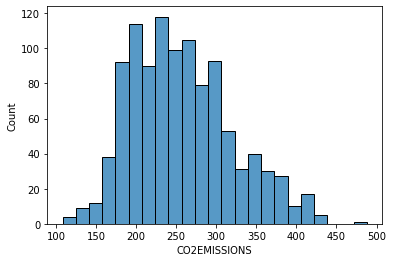

In [260]:
sns.histplot(data['CO2EMISSIONS'])

C:\Users\ASUSUX~1\AppData\Local\Temp/ipykernel_8864/2302258608.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(nrows, ncols, i + 1)


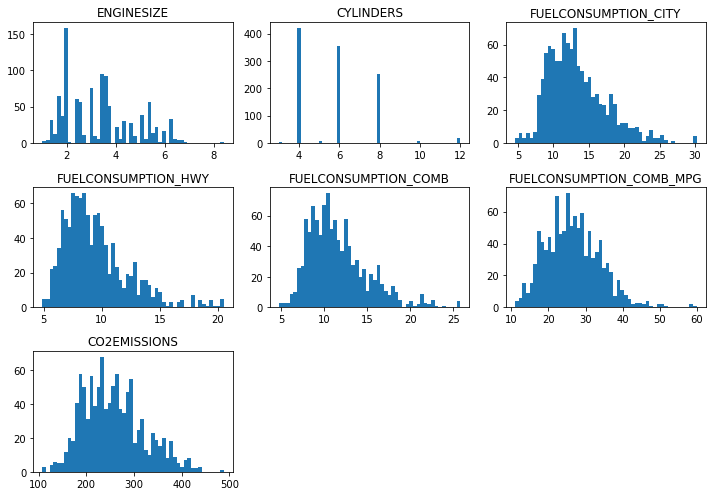

In [261]:
df_num = data.select_dtypes(exclude='category').drop('MODELYEAR',axis=1)
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = np.ceil(df_num.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins=50, ax=ax)
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

<AxesSubplot:>

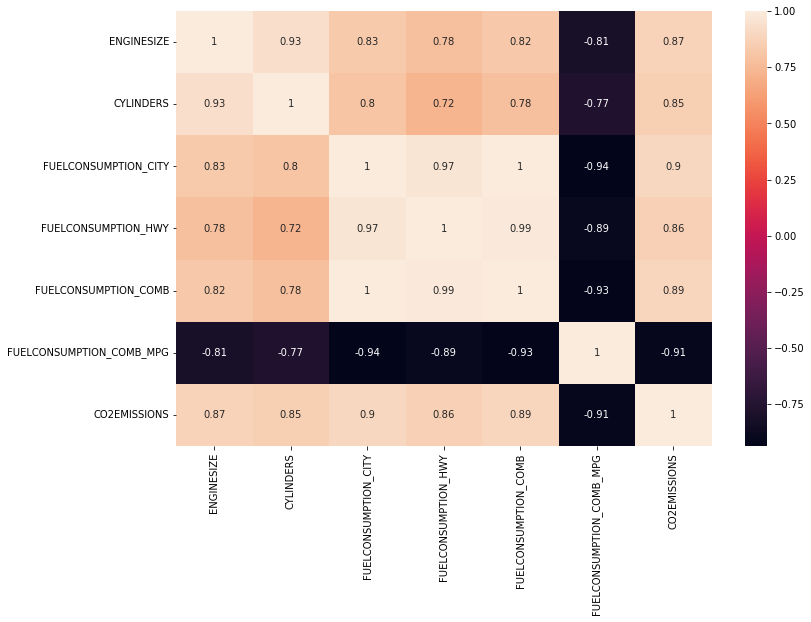

In [262]:
plt.figure(figsize=(12,8))
sns.heatmap(data= data.select_dtypes(exclude='category').drop('MODELYEAR', axis=1).corr(),annot=True)

In [263]:
data.select_dtypes(exclude='category').drop('ENGINESIZE', axis=1).corr()

,MODELYEAR,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYLINDERS,NaN,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


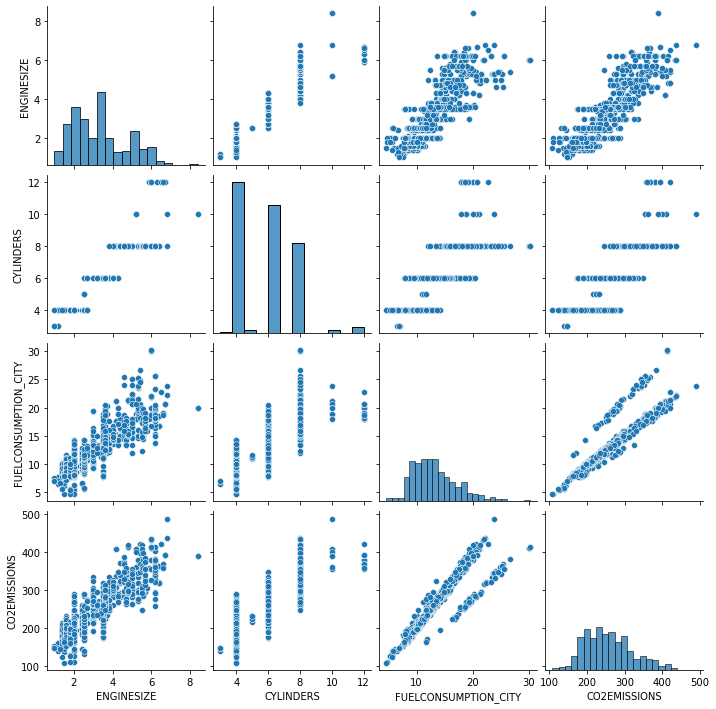

In [264]:
sns.pairplot(data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']])

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CYLINDERS'>

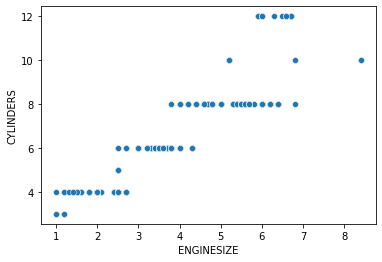

In [265]:
sns.scatterplot(x=data['ENGINESIZE'],y=data['CYLINDERS'])

# Feature Selection & Training

In [364]:
mean_absolute_error, mean_squared_error, r2_score

(<function sklearn.metrics._regression.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>,
 <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>)

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [268]:
model = LinearRegression()
model.fit(data[['ENGINESIZE']], data['CO2EMISSIONS'])

LinearRegression()

In [269]:
model.coef_

array([39.12519979])

In [270]:
model.intercept_

125.3040994953569

In [271]:
y_manual = model.coef_* data['ENGINESIZE'] + model.intercept_
y_manual

0       203.554499
1       219.204579
2       183.991899
3       262.242299
4       262.242299
           ...    
1062    242.679699
1063    250.504739
1064    242.679699
1065    250.504739
1066    250.504739
Name: ENGINESIZE, Length: 1067, dtype: float64

In [272]:
y_model = model.predict(data[['ENGINESIZE']])
y_model

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [273]:
pd.DataFrame({'y_manual':y_manual,'y_model':y_model})

,y_manual,y_model
0,203.554499,203.554499
1,219.204579,219.204579
2,183.991899,183.991899
3,262.242299,262.242299
4,262.242299,262.242299
...,...,...
1062,242.679699,242.679699
1063,250.504739,250.504739
1064,242.679699,242.679699
1065,250.504739,250.504739


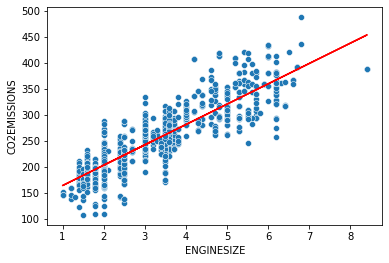

In [274]:
sns.scatterplot(data=data,x='ENGINESIZE',y='CO2EMISSIONS')
plt.plot(data['ENGINESIZE'], y_model,color='red')

# Evaluation

In [275]:
mean_absolute_error(data['CO2EMISSIONS'],y_model)

23.346887834400427

In [276]:
mean_squared_error(data['CO2EMISSIONS'],y_model)

946.3140527188749

In [277]:
r2_score(data['CO2EMISSIONS'],y_model)

0.7641458597854816

In [278]:
X_train, X_test, y_train, y_test = train_test_split(data[['ENGINESIZE']],data['CO2EMISSIONS'],\
                                                    test_size = 0.2, shuffle = True, random_state=42)

In [279]:
model = LinearRegression()
model.fit(data[['ENGINESIZE']], data['CO2EMISSIONS'])
y_pred = model.predict(data[['ENGINESIZE']])
y_pred

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [280]:
mean_absolute_error(data['CO2EMISSIONS'],y_pred)

23.346887834400427

In [281]:
r2_score(data['CO2EMISSIONS'],y_pred)

0.7641458597854816

In [282]:
from sklearn.model_selection import KFold, cross_val_score

In [283]:
folds = KFold(n_splits =5,shuffle=True,random_state=42)
cross_val_score(model, X_train, y_train, scoring = 'r2', cv=folds)

array([0.72508571, 0.74330385, 0.78385585, 0.76907905, 0.77848554])

#TUNING

In [284]:
X_train, X_test, y_train, y_test = train_test_split(data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']],\
                                                    data['CO2EMISSIONS'], test_size=0.2,shuffle=True, random_state=42)

In [285]:
X_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
333,1.4,4,7.8
106,4.4,8,12.7
585,3.0,6,9.9
55,3.0,6,11.4
213,5.3,8,16.5


In [286]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)

In [287]:
mean_absolute_error(y_test,y_pred2)

16.721593983516495

In [288]:
r2_score(y_test,y_pred2)

0.8759705206914069

In [289]:
r2_score(y_test,y_pred2)

0.8759705206914069

In [328]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [353]:
X_train, X_test, y_train, y_test = train_test_split(data.select_dtypes(exclude='category').\
                                                    drop(['MODELYEAR','CO2EMISSIONS'],axis=1),\
                                                    data['CO2EMISSIONS'], test_size=0.2,shuffle=True, random_state=42)

In [354]:
X_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
333,1.4,4,8.5,6.9,7.8,36
106,4.4,8,15.0,9.8,12.7,22
585,3.0,6,11.2,8.4,9.9,29
55,3.0,6,13.2,9.2,11.4,25
213,5.3,8,18.3,14.2,16.5,17


In [355]:
param = {'n_features_to_select':list(range(1,10))}

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, param_grid = param, scoring = 'r2',cv= folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='r2')

In [356]:
pd.DataFrame(model_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011369,0.004817,0.002590,0.000494,1,{'n_features_to_select': 1},0.725086,0.743304,0.783856,0.769079,...,0.759962,0.022320,9,0.771172,0.769215,0.759192,0.762272,0.760187,0.764408,0.004867
1,0.007384,0.002715,0.002858,0.002077,2,{'n_features_to_select': 2},0.824826,0.849626,0.857822,0.860602,...,0.852395,0.015123,8,0.860673,0.856333,0.854544,0.853243,0.851463,0.855251,0.003145
2,0.008039,0.002459,0.001002,0.002004,3,{'n_features_to_select': 3},0.826566,0.849762,0.860875,0.867154,...,0.854484,0.015411,6,0.861043,0.857068,0.860448,0.858146,0.858240,0.858989,0.001504
3,0.003121,0.002555,0.002822,0.002334,4,{'n_features_to_select': 4},0.826286,0.848690,0.857495,0.865247,...,0.853125,0.014997,7,0.861120,0.857275,0.860968,0.858326,0.858297,0.859197,0.001555
4,0.005940,0.001385,0.001106,0.002212,5,{'n_features_to_select': 5},0.829856,0.858337,0.881529,0.865378,...,0.864338,0.020084,5,0.866031,0.860698,0.886114,0.858336,0.884493,0.871134,0.011846
5,0.004026,0.002037,0.002908,0.002381,6,{'n_features_to_select': 6},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
6,0.003599,0.001028,0.002864,0.001411,7,{'n_features_to_select': 7},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
7,0.003014,0.002461,0.002906,0.002380,8,{'n_features_to_select': 8},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
8,0.003013,0.002481,0.001006,0.002012,9,{'n_features_to_select': 9},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881


In [357]:

pd.DataFrame(model_cv.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_features_to_select', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'r2_score')

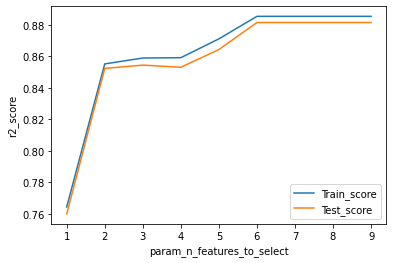

In [359]:
cv_results=pd.DataFrame(model_cv.cv_results_)
plt.plot(cv_results['param_n_features_to_select'],cv_results['mean_train_score'])
plt.plot(cv_results['param_n_features_to_select'],cv_results['mean_test_score'])
plt.legend(['Train_score','Test_score'],loc='lower right')
plt.xlabel('param_n_features_to_select')
plt.ylabel('r2_score')

In [361]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm,n_features_to_select=6)
rfe.fit(X_train,y_train)

y_pred3=rfe.predict(X_test)


In [363]:
print(r2_score(y_test,y_pred2))

print(r2_score(y_test,y_pred3))


0.8759705206914069
0.9034041224574011
